In [142]:
import pandas as pd

In [157]:
df = pd.DataFrame({'letter1':   ['A','A','A','B','B','C','C'],
                   'letter2':   ['B','B','B','D','C','A','A'],
                    'value':    ['A','A','B','D','B','C','A']})


In [158]:
uniques=pd.concat([df[col] for col in df.columns]).unique()

In [159]:
cooc = pd.DataFrame(index=uniques, columns=uniques)

In [160]:
dictcols=df.columns

In [161]:
for icoocrow, coocrow in enumerate(cooc.index):
    for icooccol, cooccol in enumerate(cooc.columns):
        if icoocrow > icooccol:
            count=0
            for index, row in df[[*dictcols]].iterrows():
                if cooccol in list(row) and coocrow in list(row):
                    count+=1
            cooc.loc[coocrow,cooccol]=count

In [162]:
cooc=cooc.fillna(0)

In [163]:
cooc=cooc+cooc.transpose()

In [164]:
cooc

,A,B,C,D
A,0,3,2,0
B,3,0,1,1
C,2,1,0,0
D,0,1,0,0


In [165]:
def onezero(num):
    if num>0: return 1
    else: return 0

In [166]:
cooc

,A,B,C,D
A,0,3,2,0
B,3,0,1,1
C,2,1,0,0
D,0,1,0,0


In [167]:
G=nx.from_numpy_matrix(cooc.to_numpy())

In [168]:
edges = G.edges()
weights = [G[u][v]['weight'] for u,v in edges]

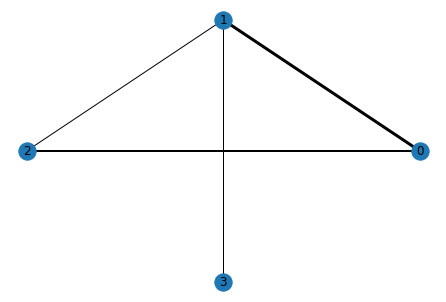

In [172]:
nx.draw_shell(G, with_labels=True, width=weights)

In [82]:
import networkx as nx

In [83]:
G = nx.Graph()

In [84]:
G.add_nodes_from(cooc.index)

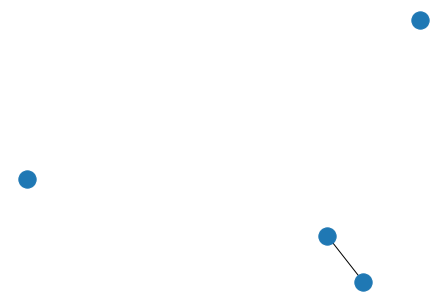

In [90]:
nx.draw(G)

In [89]:
G.add_edge('A','B')

In [93]:
cooc.apply(onezero)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [92]:
def onezero(num):
    if num>0: return 1
    else: return 0

In [96]:
cooc['A'].apply(onezero)

A    0
B    1
C    1
D    0
Name: A, dtype: int64

In [99]:
cooc.applymap(onezero)

,A,B,C,D
A,0,1,1,0
B,1,0,1,1
C,1,1,0,1
D,0,1,1,0


In [74]:
G.add_node('A')

In [71]:
G.add_edge(4,5)

In [51]:
G.add_nodes_from([2,3])

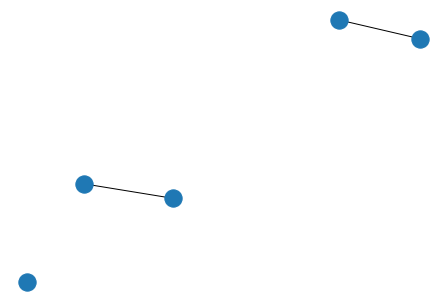

In [75]:
nx.draw(G)

In [61]:
H = nx.path_graph(10)

In [62]:
G.add_nodes_from(H)

In [65]:
G.add_node(H)